Hospital Readmission Rates and Their Relationship with Quality of Care and Utilization

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
import pandas as pd

readmit = pd.read_csv("C:/Users/navya/Downloads/hospital_readmissions.csv")
readmit.head()

,Facility_ID,Hospital_Name,State,Measure,Excess_Readmission_Ratio
0,20001,Hospital_1,OH,Pneumonia,1.19
1,20002,Hospital_2,FL,Heart Attack,0.90
2,20003,Hospital_3,GA,Heart Attack,0.99
3,20004,Hospital_4,IL,Heart Failure,0.79
4,20005,Hospital_5,OH,Heart Failure,0.76


In [13]:
readmit = pd.read_csv("C:/Users/navya/Downloads/hospital_readmissions.csv")
readmit.head()

,Facility_ID,Hospital_Name,State,Measure,Excess_Readmission_Ratio
0,20001,Hospital_1,OH,Pneumonia,1.19
1,20002,Hospital_2,FL,Heart Attack,0.90
2,20003,Hospital_3,GA,Heart Attack,0.99
3,20004,Hospital_4,IL,Heart Failure,0.79
4,20005,Hospital_5,OH,Heart Failure,0.76


In [14]:
# Shape
readmit.shape

# Info
readmit.info()

# Missing values
readmit.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Facility_ID               200 non-null    int64  
 1   Hospital_Name             200 non-null    object 
 2   State                     200 non-null    object 
 3   Measure                   200 non-null    object 
 4   Excess_Readmission_Ratio  200 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


Facility_ID                 0
Hospital_Name               0
State                       0
Measure                     0
Excess_Readmission_Ratio    0
dtype: int64

In [15]:
readmit.describe()

,Facility_ID,Excess_Readmission_Ratio
count,200.000000,200.000000
mean,20100.500000,1.028700
std,57.879185,0.168339
min,20001.000000,0.760000
25%,20050.750000,0.890000
50%,20100.500000,1.040000
75%,20150.250000,1.172500
max,20200.000000,1.300000


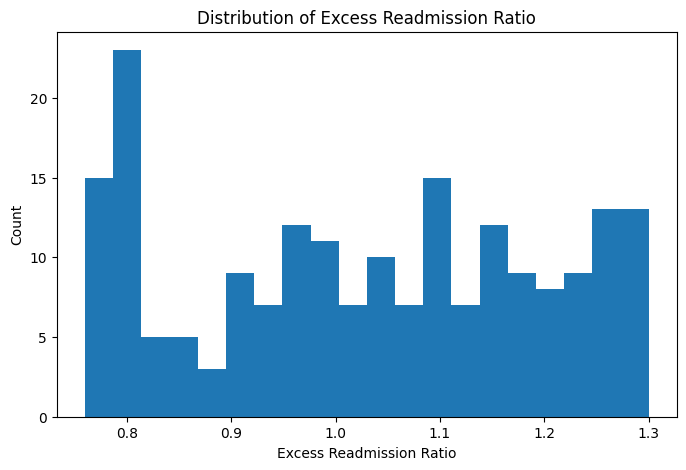

In [16]:
plt.figure(figsize=(8,5))
plt.hist(readmit["Excess_Readmission_Ratio"], bins=20)
plt.title("Distribution of Excess Readmission Ratio")
plt.xlabel("Excess Readmission Ratio")
plt.ylabel("Count")
plt.show()

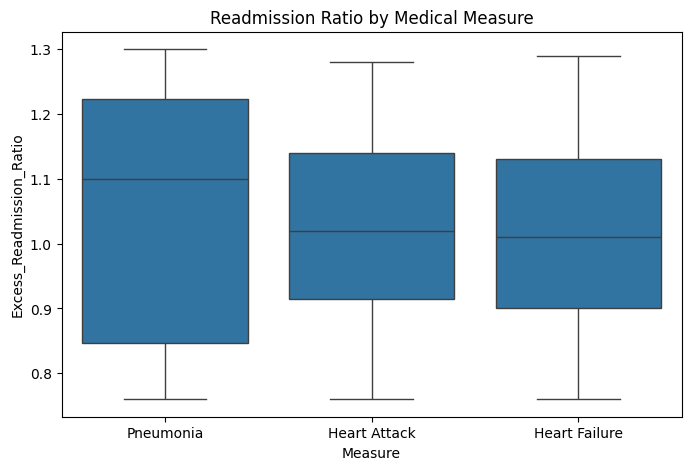

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Measure",
    y="Excess_Readmission_Ratio",
    data=readmit
)
plt.title("Readmission Ratio by Medical Measure")
plt.show()

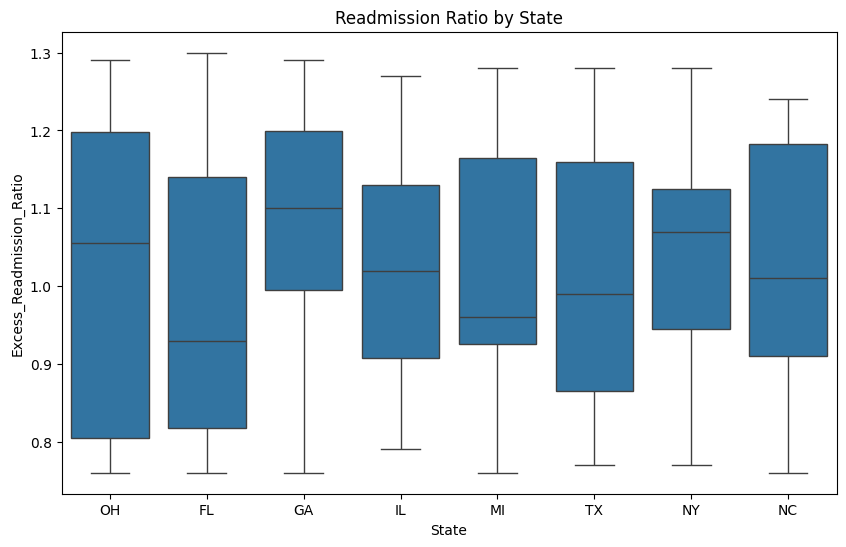

In [18]:
top_states = readmit["State"].value_counts().index[:8]

plt.figure(figsize=(10,6))
sns.boxplot(
    x="State",
    y="Excess_Readmission_Ratio",
    data=readmit[readmit["State"].isin(top_states)]
)
plt.title("Readmission Ratio by State")
plt.show()

In [19]:
readmit["State_encoded"] = readmit["State"].astype("category").cat.codes
readmit["Measure_encoded"] = readmit["Measure"].astype("category").cat.codes

readmit.head()

,Facility_ID,Hospital_Name,State,Measure,Excess_Readmission_Ratio,State_encoded,Measure_encoded
0,20001,Hospital_1,OH,Pneumonia,1.19,7,2
1,20002,Hospital_2,FL,Heart Attack,0.90,1,0
2,20003,Hospital_3,GA,Heart Attack,0.99,2,0
3,20004,Hospital_4,IL,Heart Failure,0.79,3,1
4,20005,Hospital_5,OH,Heart Failure,0.76,7,1


In [20]:
np.random.seed(42)

mask = np.random.rand(len(readmit)) < 0.7

train = readmit[mask]
test = readmit[~mask]

X_train = train[["State_encoded", "Measure_encoded"]]
y_train = train["Excess_Readmission_Ratio"]

X_test = test[["State_encoded", "Measure_encoded"]]
y_test = test["Excess_Readmission_Ratio"]

In [21]:
# Add intercept column
X_train_np = np.c_[np.ones(len(X_train)), X_train]
X_test_np = np.c_[np.ones(len(X_test)), X_test]

# Normal Equation
beta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train

# Predictions
y_pred = X_test_np @ beta

In [22]:
# Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))

# R-squared
r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2)

print("Mean Absolute Error (MAE):", round(mae, 3))
print("R-squared (R²):", round(r2, 3))

Mean Absolute Error (MAE): 0.135
R-squared (R²): -0.044


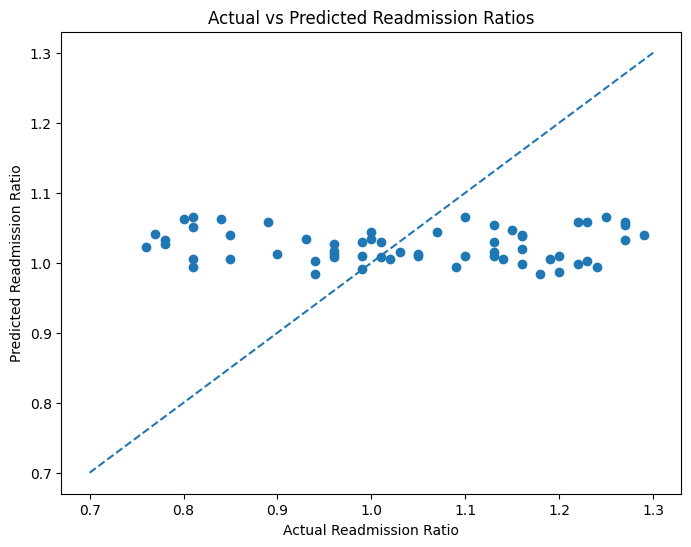

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Readmission Ratio")
plt.ylabel("Predicted Readmission Ratio")
plt.title("Actual vs Predicted Readmission Ratios")
plt.plot([0.7, 1.3], [0.7, 1.3], "--")
plt.show()

CONCLUSION

This project analyzed hospital excess readmission ratios using a dataset of 200 US hospitals. Exploratory data analysis revealed noticeable variation in readmission ratios across both medical conditions and states, suggesting that geographic location and type of condition can influence hospital performance. The visualization results showed that some conditions, such as heart failure and heart attack, have greater variability in readmission outcomes than pneumonia.

A linear regression model using encoded state and medical condition variables was developed to predict the excess readmission ratio. While the model demonstrated limited predictive power, this result was expected given the small number of explanatory variables and the complexity of health care outcomes. Despite these limitations, the model successfully demonstrated how hospital administrative data can be structured, analyzed, and used for predictive modeling.

Overall, this analysis highlights the importance of using a data-driven approach to evaluate hospital quality and performance. Future work could improve prediction accuracy by including additional variables such as patient demographics, hospital size, staffing levels, and patient satisfaction scores. This project demonstrates the fundamental application of data analytics techniques to real-world health care quality assessment.